# Topology Draw


In [1]:
%cd -q ../../
import os, sys
from espy_user_mobility.scenario_build import create_grid, create_base_stations, create_topology, create_cloud_servers
import numpy as np
import EdgeSimPy.edge_sim_py as espy
import matplotlib.pyplot as plt
import networkx as nx

x_size = 100
y_size = x_size
grid = create_grid(x_size, y_size)
create_base_stations(grid)
topology = create_topology()
grid = create_cloud_servers(topology, grid)
print()

/Users/paulo/Developer/python/espy-user-mobility/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Creating Grid
Creating Edge Base Stations
Creating Edge Topology
Creating Cloud Base Stations and Switches
Creating Grid
Creating Cloud Topology
Creating Cloud Servers



In [2]:
spectral_pos = nx.spectral_layout(topology, weight="delay")

In [3]:
kamada_pos = nx.kamada_kawai_layout(topology, pos=spectral_pos, weight="delay")
# kamada_pos = nx.kamada_kawai_layout(topology, weight="delay")

/Users/paulo/Developer/python/espy-user-mobility/.venv/lib/python3.11/site-packages/networkx/drawing/layout.py:745: RuntimeWarning: divide by zero encountered in divide
  direction = np.einsum("ijk,ij->ijk", delta, 1 / (nodesep + np.eye(nNodes) * 1e-3))


In [4]:
# spring_pos = nx.spring_layout(topology, weight="delay")

In [5]:
# pos_dict = {"kamada-kawai_init_spectral": kamada_pos, "spectral": spectral_pos, "spring_init_spectral": spring_pos}
# pos_dict = {"kamada": kamada_pos, "spectral": spectral_pos}
# pos_dict = {"spectral": spectral_pos}
pos_dict = {"kamada": kamada_pos}

Creating kamada plot


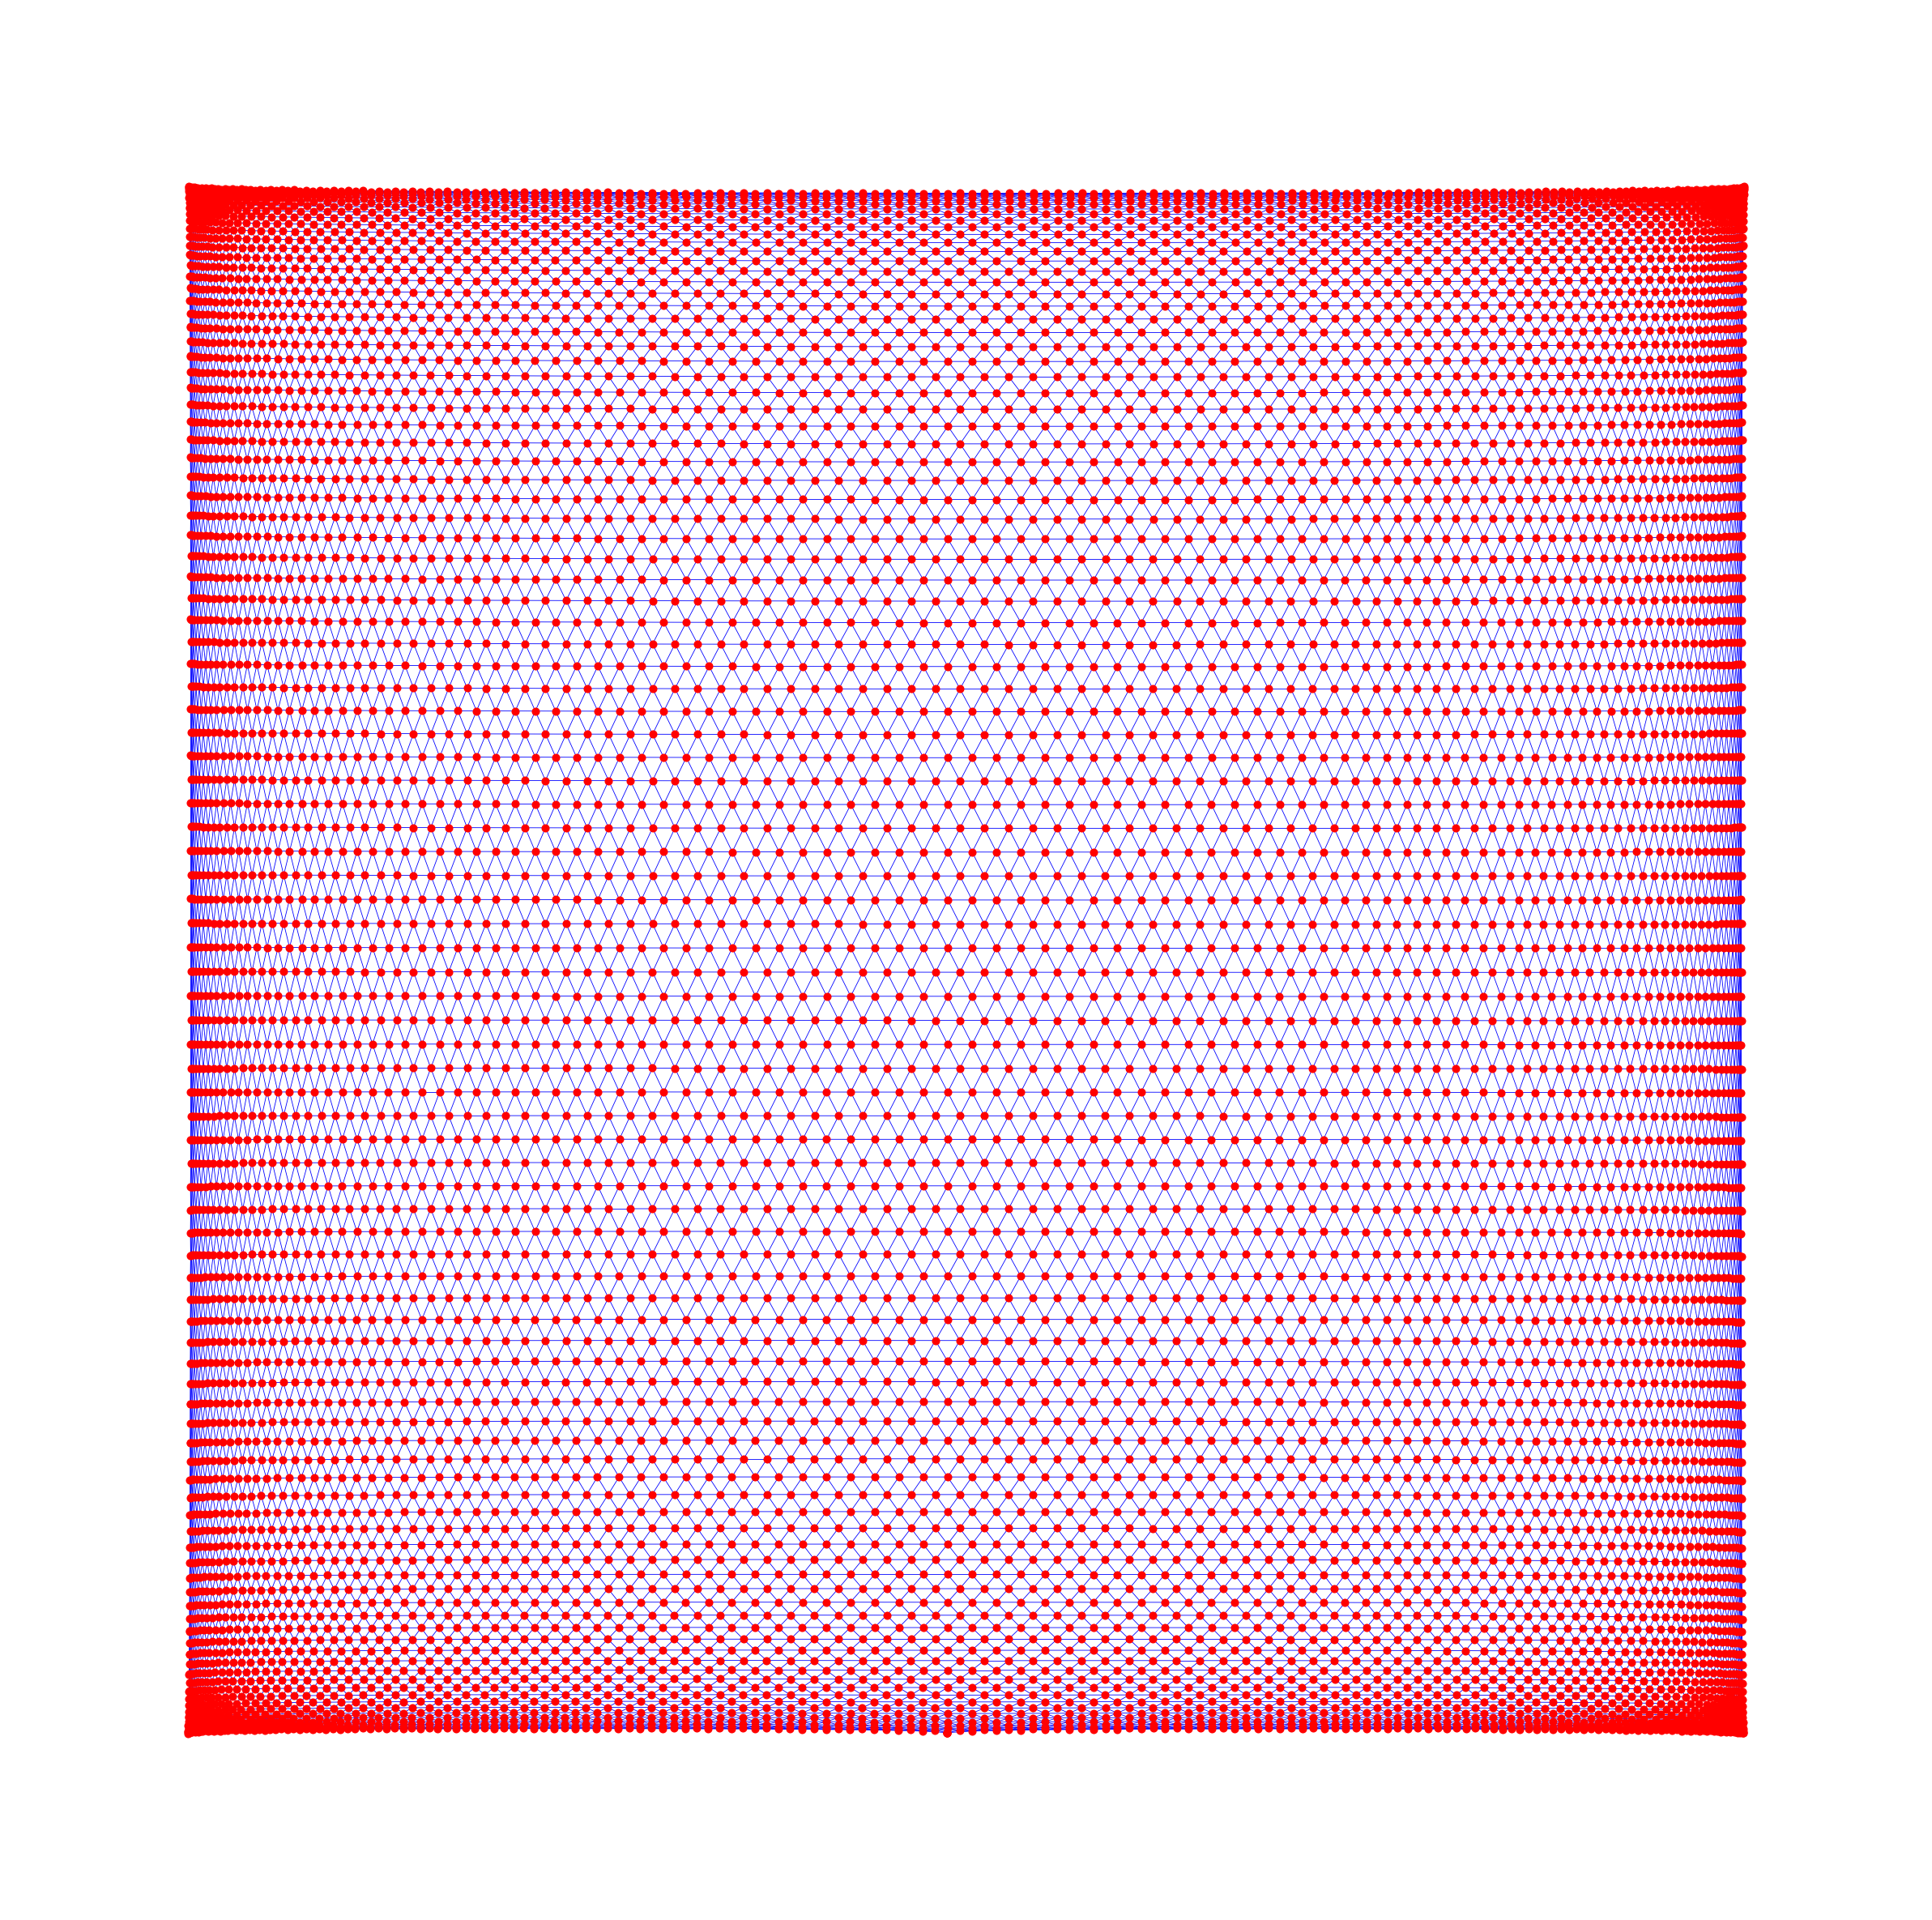

In [6]:
plt.clf()
plt.cla()
plt.close()
for name, pos in pos_dict.items():
    print(f"Creating {name} plot")
    plt.figure(figsize=(10, 10), dpi=300)
    plt.axis("off")
    nx.draw(
        topology,
        with_labels=False,
        font_size=2,
        font_color=(0, 0, 0, 0.5),
        node_size=2,
        node_color="red",
        edge_color="blue",
        width=0.2,
        pos=pos,
    )
    plt.savefig(f"topology_images/{x_size}x{y_size}_{name}.svg")
    plt.savefig(f"topology_images/{x_size}x{y_size}_{name}.png")